# Documentation

In this notebook, we start by loading the dataset and providing a brief preview of it. Next, we outline all the steps for annotation on the CVAT platform. Finally, because YOLO requires annotations in a strict format, we organize the data to prepare the dataset for the next step.

# Setting Working Directory

In [ ]:
import os

# set the working directory (this version is created for Google Colab)
my_wd = "/content"
os.chdir(my_wd)
print("Changed working directory to:", os.getcwd())

Changed working directory to: /content


# Mounting Google Drive

In [ ]:
from google.colab import drive

# mount google drive
drive.mount(os.path.join(my_wd,"drive"))

Mounted at /content/drive


# Unzipping the Folder with the Dataset

In [ ]:
# define the google drive location
drive_location = "drive/your_path.zip"

# create the final path
zip_file_path = os.path.join(my_wd, drive_location)

# keep the name of the zipped folder
zip_basename = os.path.splitext(os.path.basename(drive_location))[0]

# unzip the folder
!unzip -q "{zip_file_path}" -d "{zip_basename}"

# Dataset Preview

In [ ]:
import os
import random

# Set the path to the folder containing images
folder_path = "Your Folder Name"
folder_path = os.path.join(my_wd, folder_path)

# Get the list of files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Count the number of images
num_images = len(image_files)
print(f"Number of images in the folder: {num_images}")


Number of images in the folder: 119



Displaying sample images:


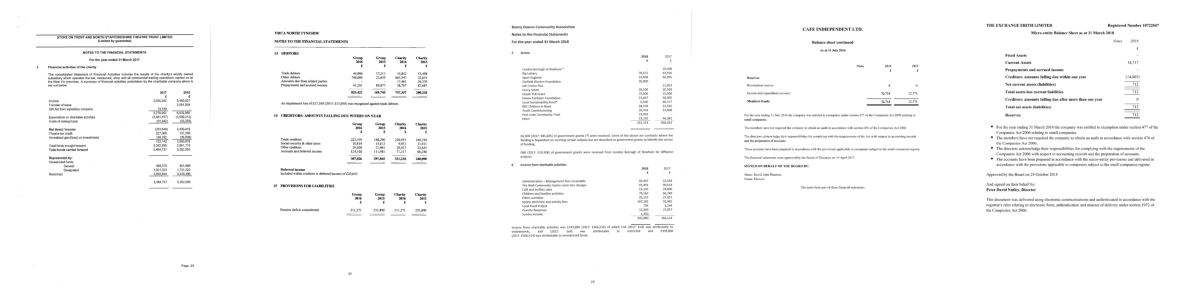

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Print a sample of images
sample_size = 5
sample_images = random.sample(image_files, min(sample_size, num_images))

# Set up subplots
fig, axes = plt.subplots(1, len(sample_images), figsize=(15, 8))

print("\nDisplaying sample images:")
for i, image_name in enumerate(sample_images):
    image_path = os.path.join(folder_path, image_name)
    img = mpimg.imread(image_path)
    axes[i].imshow(img)
    axes[i].axis('off')  # Turn off axis labels

plt.show()

# Annotation using the Open Data Annotation Platform CVAT

Upon successfully signing up on CVAT, the initial action involves creating a new project using the provided form. A crucial step is to click on "Add Labels" and specify the names for our labels; in this instance, we have a singular label, namely "table." Subsequently, assign a name to the project and proceed by clicking on "Submit & Open."

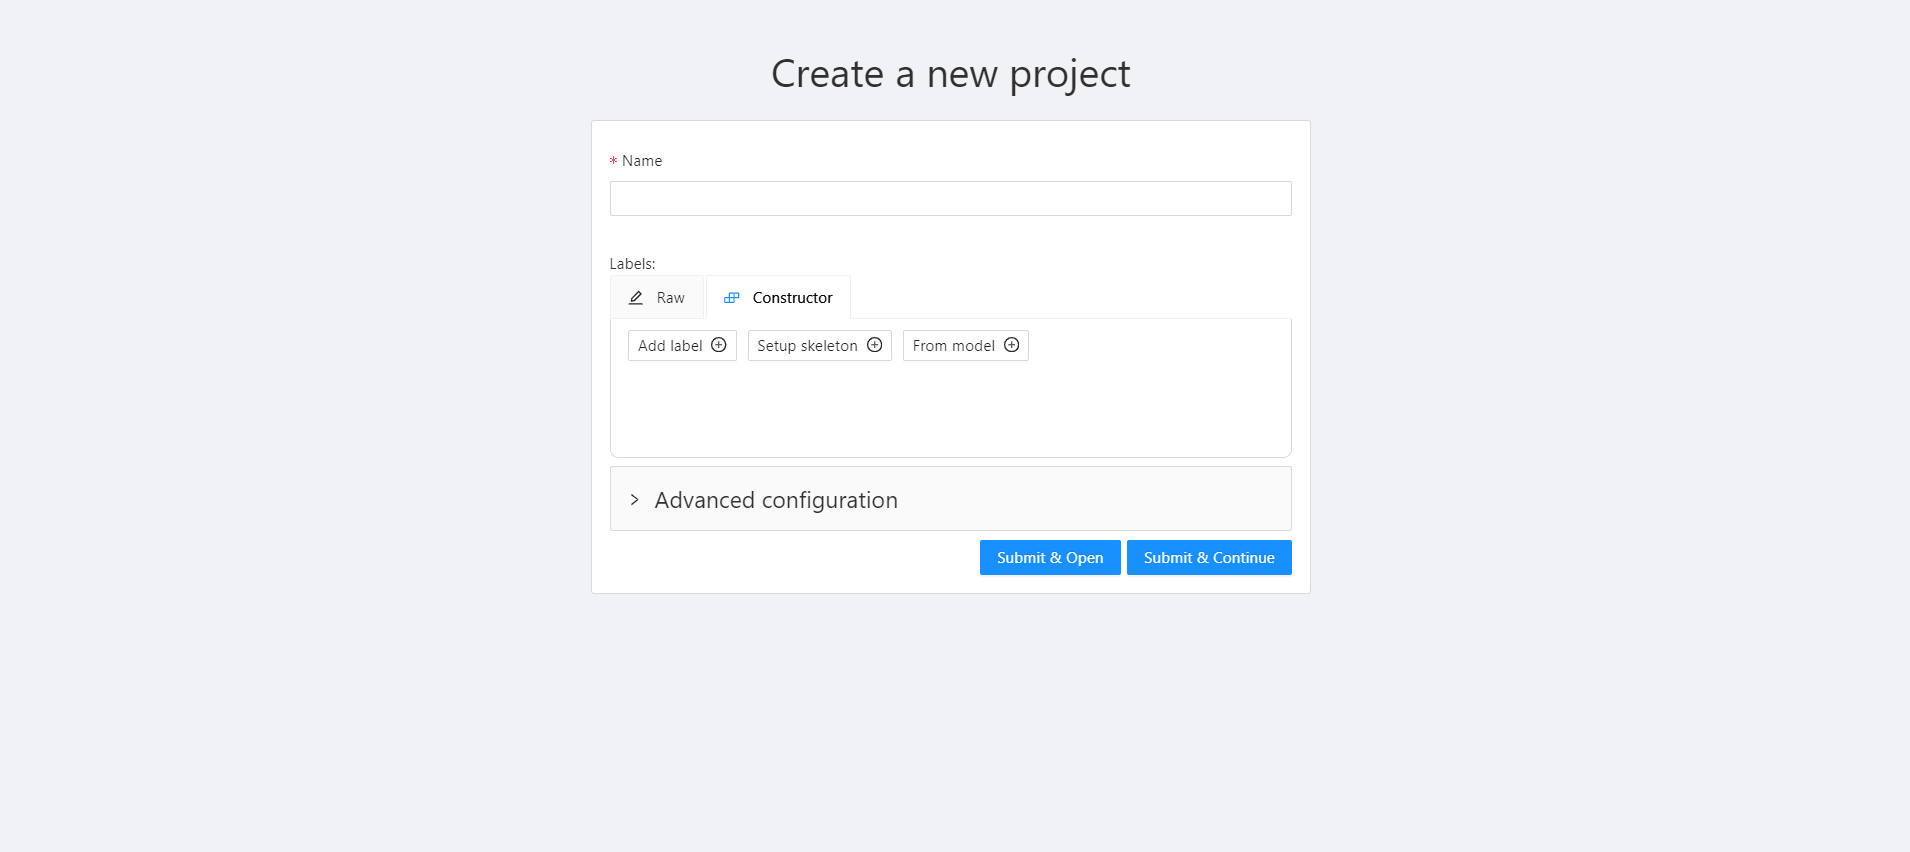

In [ ]:
from IPython.display import Image, display

# display the image
display(Image(filename=file_name))

Following these steps, a user interface akin to the depicted image will be encountered. Clicking on the "+" button initiates the process of creating a new task. Subsequently, users are prompted to designate a task name and upload the images. It is imperative, within the advanced settings, to ensure that the images are uploaded with 100% quality rather than the default 70%. This guarantees optimal image fidelity during the annotation process. Finally we click "Submit & Open"

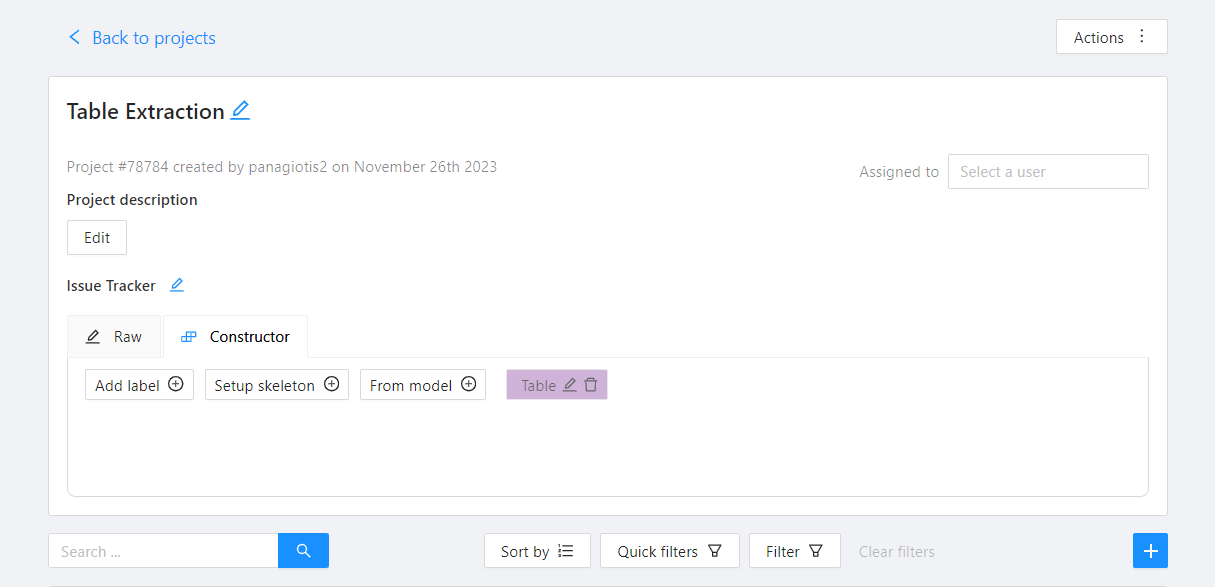

In [ ]:
from IPython.display import Image, display

# display the image
display(Image(filename=file_name))

After this step, simply click on the pre-existing job, and we are ready to initiate the dataset annotation process. A demonstration of this annotation procedure is presented below for your reference.

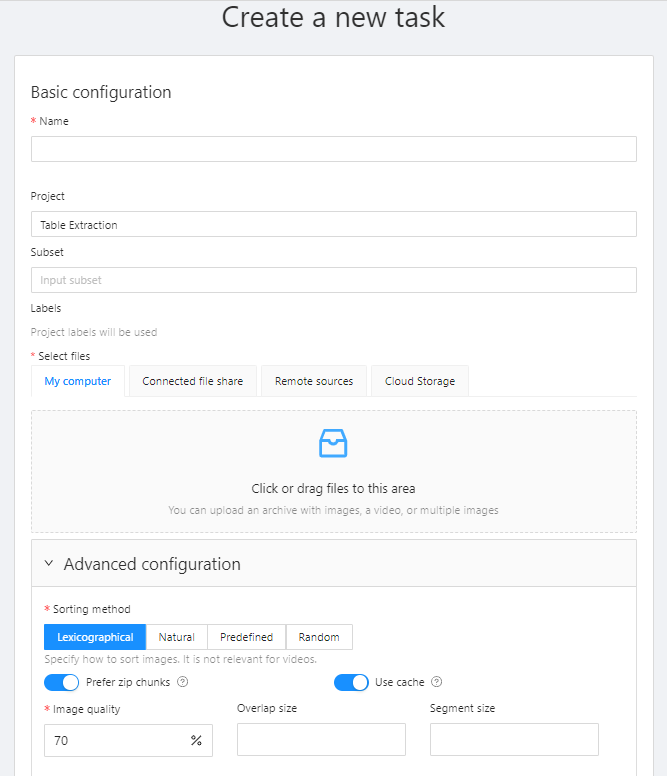

In [ ]:
from IPython.display import Image, display

# display the image
display(Image(filename=file_name))


To annotate an image, engage the "Draw new rectangle" tool and proceed to highlight the area corresponding to the table. This process is repeated for each instance within the dataset.

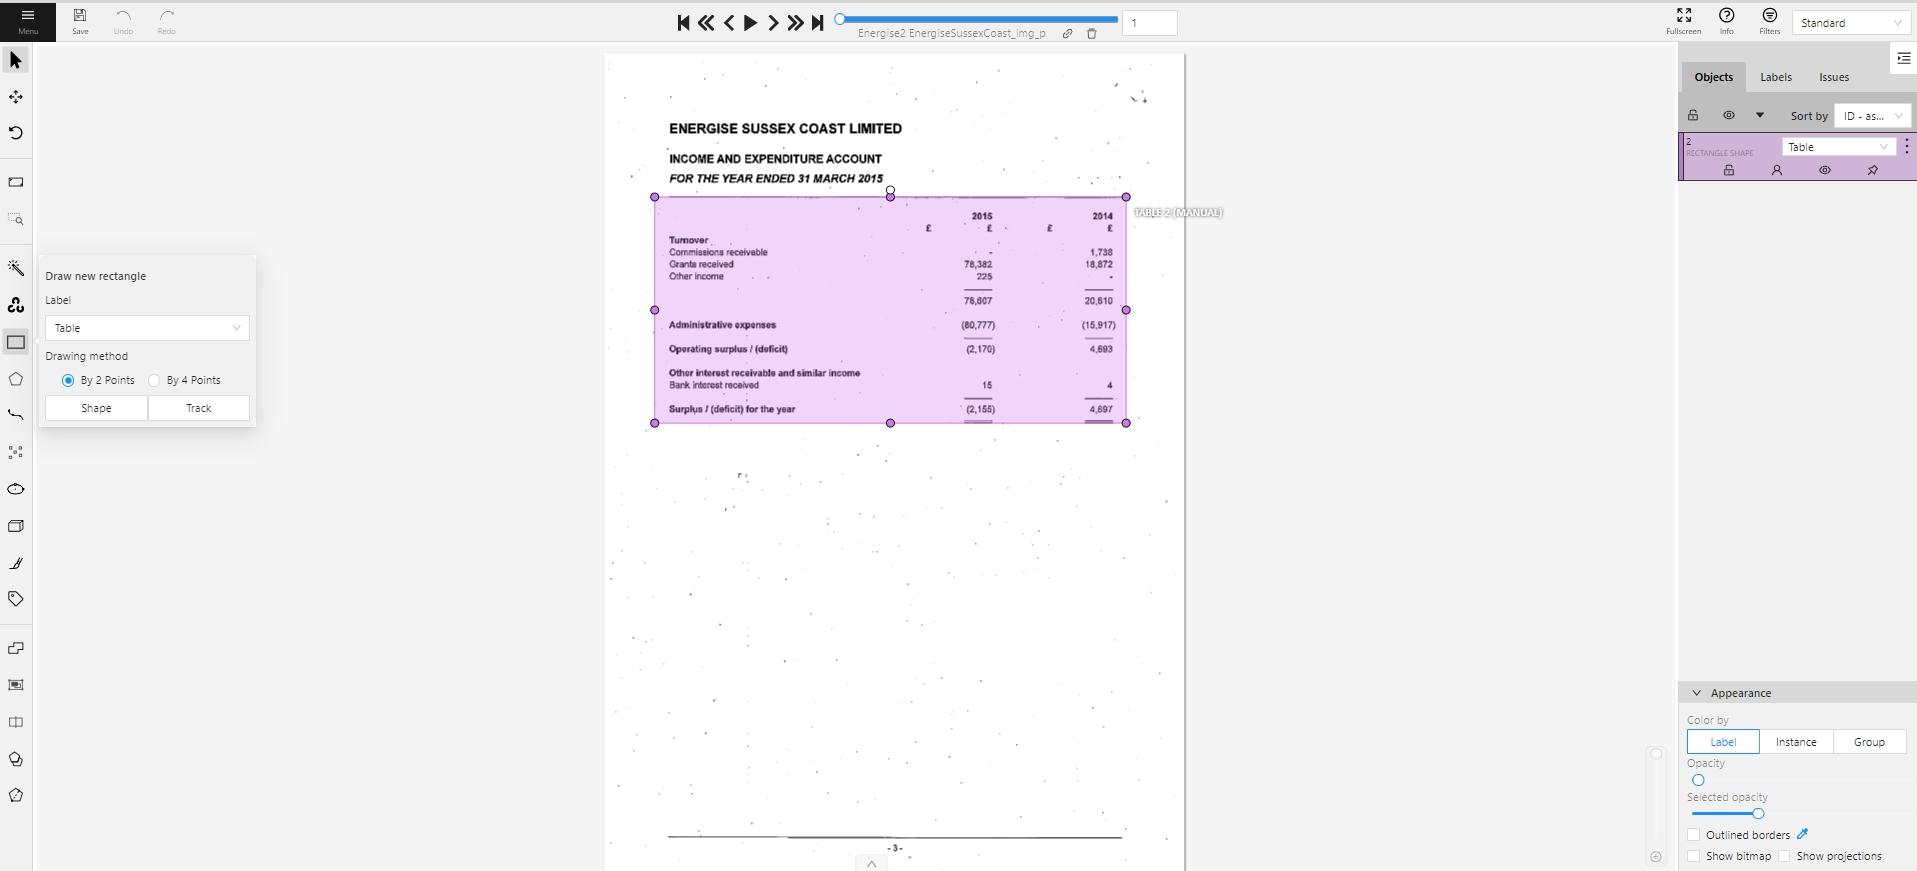

In [ ]:
from IPython.display import Image, display

# display the image
display(Image(filename=file_name))


Upon the completion of the annotation process, the next step involves downloading the results. Navigate to the corresponding task, and click on the three dots associated with our job. From the dropdown menu, select "Export Annotations," as illustrated in the image below.

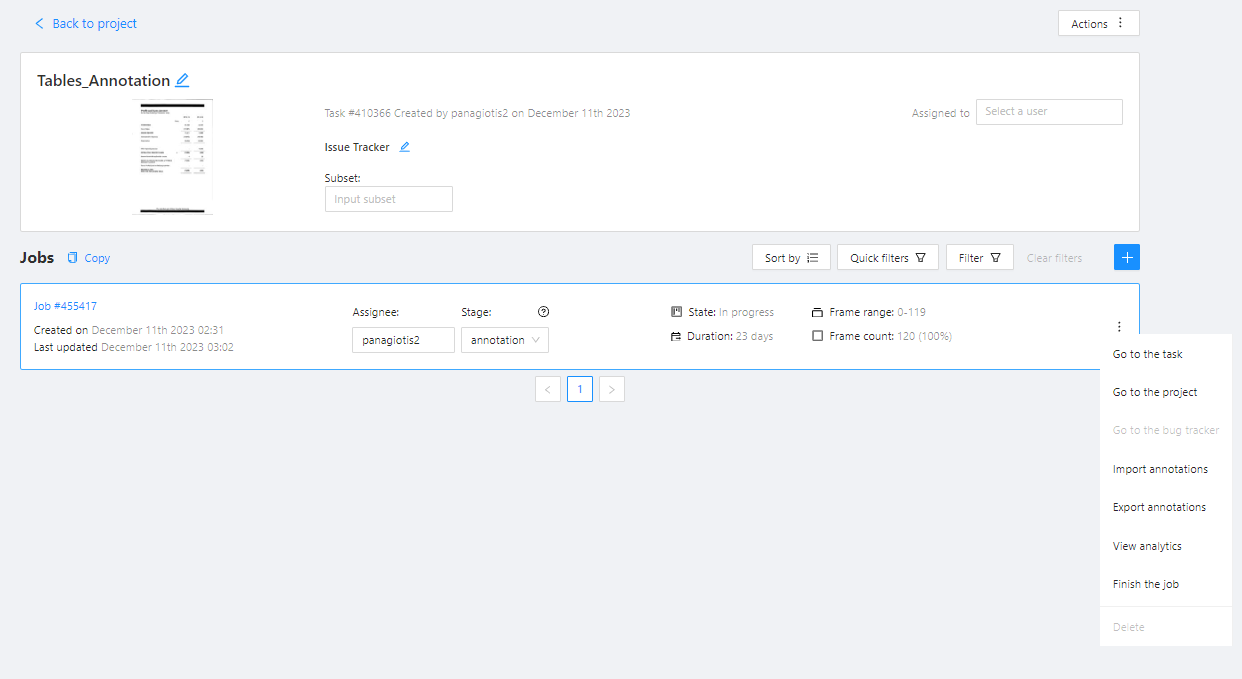

In [ ]:
from IPython.display import Image, display

# display the image
display(Image(filename=file_name))


In the concluding steps, the annotated data can be downloaded by selecting the YOLO 1.1 format. This option is available by clicking on the three dots associated with the job and choosing "Download as YOLO 1.1," as depicted in the image below.

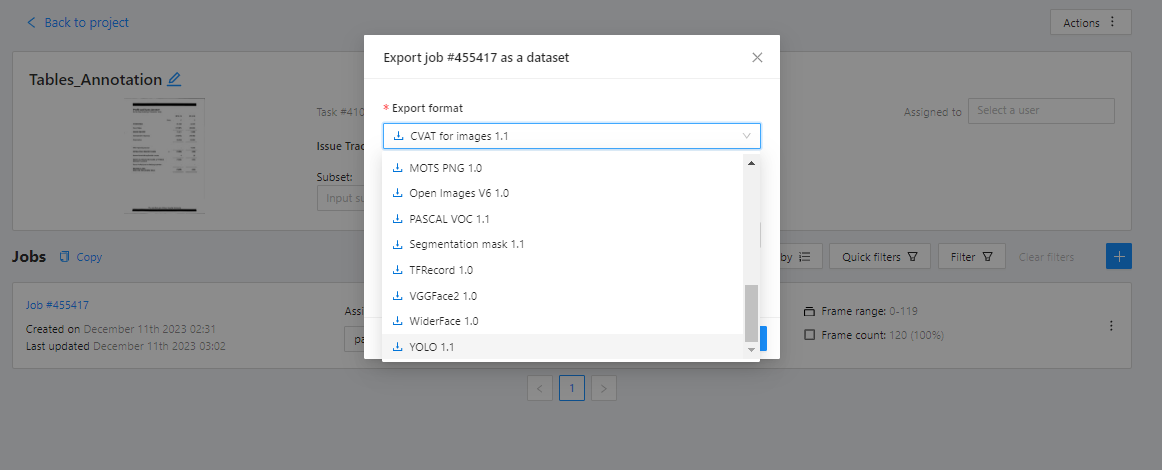

In [ ]:
from IPython.display import Image, display

# display the image
display(Image(filename=file_name))


The downloaded file is in ZIP format. After extraction, we find a folder named `obj_train_data` containing .txt files. These text files encapsulate comprehensive annotation information for each image. Below is an illustrative example of the content within a single text file.

In [ ]:
from IPython.display import Image, display

# define the google drive location
file_name = "drive/your_path.txt"

# Read and display the content of the text file
with open(file_name, 'r') as file:
    content = file.read()
    print(content)

0 0.528298 0.238320 0.786935 0.143249
0 0.527325 0.417373 0.788881 0.140517
0 0.528298 0.674959 0.790828 0.118452




For a single line:

* 0: the label (in our case, only one label, "Table")
* The other 4 values represent the bounding box coordinates within the image.

## Loading and Unzipping the CVAT exported data to our Working Directory

In [ ]:
# define the google drive location
drive_location = "drive/your_annotations_path.zip"

# create the final path
zip_file_path = os.path.join(my_wd, drive_location)

# keep the name of the zipped folder
zip_basename = os.path.splitext(os.path.basename(drive_location))[0]

# unzip the folder
!unzip -q "{zip_file_path}" -d "{zip_basename}"

# Data Organization

Due to the stringent file-reading structure of YOLOv8, it is imperative to organize the data in a specific manner. We need to create a folder that houses two subfolders: the first, named `images`, should contain all the images in PNG format from the Folder Containing the Data. The second subfolder, named `labels`, should contain information from the `obj_train_data` folder. The provided code accomplishes this task.

In [ ]:
import shutil
import os

# Define paths to the existing folders and the new folder
images = "your_images_folder_path"
images = os.path.join(my_wd, images)

labels = "your_annotations_path/obj_train_data"
labels = os.path.join(my_wd, labels)

new_folder = "Data for YOLOv8"
new_folder = os.path.join(my_wd, new_folder)

names_folder_path = os.path.join(new_folder, "images")
labels_folder_path = os.path.join(new_folder, "labels")

# Create the new folder and subfolders if they don't exist
if not os.path.exists(new_folder):
    os.makedirs(new_folder)
if not os.path.exists(names_folder_path):
    os.makedirs(names_folder_path)
if not os.path.exists(labels_folder_path):
    os.makedirs(labels_folder_path)

# Copy the contents of the first folder to "names" subfolder
for filename in os.listdir(images):
    src_path = os.path.join(images, filename)
    dst_path = os.path.join(names_folder_path, filename)
    shutil.copy(src_path, dst_path)

# Copy the contents of the second folder to "labels" subfolder
for filename in os.listdir(labels):
    src_path = os.path.join(labels, filename)
    dst_path = os.path.join(labels_folder_path, filename)
    shutil.copy(src_path, dst_path)


So now that our dataset is in a compatible format for the YOLO model, the next step involves splitting it into training, testing, and validation sets. This process will be detailed in the upcoming step.


# Zipping and Saving the Data for YOLOv8 to Google Drive

In [ ]:
# Define the Google Drive folder name
folder_name = "Data for YOLOv8"

# Create the final path
zip_folder_path = os.path.join(my_wd, folder_name + ".zip")

# Zip the folder
!zip -r -q "{zip_folder_path}" "{folder_name}"

In [ ]:
# Define the google drive destination and files name
drive_destination = os.path.join(my_wd,"drive/your_path.zip")

# Create the "Data for YOLOv8" folder if it doesn't exist
random_state_folder = os.path.join(my_wd, "drive/your_annotations_path/Data for YOLOv8")
os.makedirs(random_state_folder, exist_ok=True)

# Create the final paths
file_path = os.path.join(my_wd, drive_destination)
zip_folder_path = os.path.join(my_wd, "Data for YOLOv8.zip")

# Copy the best model to the destination
!cp "{zip_folder_path}" "{file_path}"